<a href="https://colab.research.google.com/github/Leorev01/Machine-Learning/blob/main/Loan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mynameisleo123_loandata_path = kagglehub.dataset_download('mynameisleo123/loandata')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandata/Loan Prediction Dataset/test_loan.csv
/kaggle/input/loandata/Loan Prediction Dataset/train_loan.csv


In [ ]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/loandata/Loan Prediction Dataset/train_loan.csv')
test_data = pd.read_csv('/kaggle/input/loandata/Loan Prediction Dataset/test_loan.csv')

#Display the first few rows of the training data
print(train_data.head())
#Display null values sum for each training data column
print(train_data.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Fill missing values in categorical columns with the mode and in numerical columns with the median
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

# Check if there are still any missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Convert 'Dependents' column to numerical
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(int)

# Verify the changes
print(train_data.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2       

In [ ]:
# Split the data into features and target variable
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Display the shapes of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (614, 11)
Target shape: (614,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the splits to verify
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (429, 11)
Testing Features Shape: (185, 11)
Training Labels Shape: (429,)
Testing Labels Shape: (185,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

print("Models trained successfully.")


Models trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

# Evaluate Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)

# Print evaluation metrics
print("Logistic Regression - Accuracy:", accuracy_log_reg)
print("Logistic Regression - Precision:", precision_log_reg)
print("Logistic Regression - Recall:", recall_log_reg)

print("\nDecision Tree - Accuracy:", accuracy_decision_tree)
print("Decision Tree - Precision:", precision_decision_tree)
print("Decision Tree - Recall:", recall_decision_tree)


Logistic Regression - Accuracy: 0.8486486486486486
Logistic Regression - Precision: 0.8322147651006712
Logistic Regression - Recall: 0.9763779527559056

Decision Tree - Accuracy: 0.7135135135135136
Decision Tree - Precision: 0.8490566037735849
Decision Tree - Recall: 0.7086614173228346


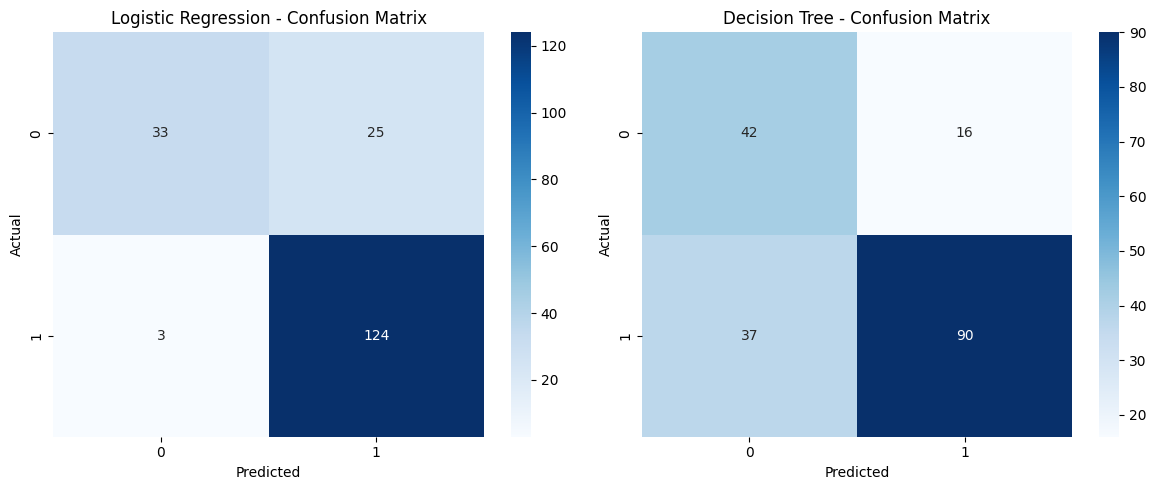

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_log_reg, accuracy_decision_tree],
    'Precision': [precision_log_reg, precision_decision_tree],
    'Recall': [recall_log_reg, recall_decision_tree]
})

print(comparison_df)


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.848649   0.832215  0.976378
1        Decision Tree  0.713514   0.849057  0.708661
